___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project - Solution

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [3]:
df = pd.read_csv('train.csv')

**Check the head of the dataframe.**

In [4]:
df = df.drop(['Id','idhogar' ],axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 141 entries, v2a1 to Target
dtypes: float64(8), int64(130), object(3)
memory usage: 10.3+ MB


In [6]:
df.head() 

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,NaN,0,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,NaN,0,8,0,1,1,0,NaN,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [7]:
char_cols = df.dtypes.pipe(lambda x: x[x == 'object']).index

for c in char_cols:
    df[c] = pd.factorize(df[c])[0]

In [8]:
df = pd.concat([
        df.select_dtypes([], ['category']),
        df.select_dtypes(['category']).apply(pd.Series.astype, dtype='category')
        ], axis=1).reindex_axis(df.columns, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  after removing the cwd from sys.path.


In [9]:
df.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,NaN,0,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,NaN,0,8,0,1,1,0,NaN,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [10]:
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values = 'NaN',strategy="most_frequent")

imputer.fit(df)

x = imputer.transform(df)

df = pd.DataFrame(x, columns=df.columns)

In [11]:
df.isnull().any()

v2a1               False
hacdor             False
rooms              False
hacapo             False
v14a               False
refrig             False
v18q               False
v18q1              False
r4h1               False
r4h2               False
r4h3               False
r4m1               False
r4m2               False
r4m3               False
r4t1               False
r4t2               False
r4t3               False
tamhog             False
tamviv             False
escolari           False
rez_esc            False
hhsize             False
paredblolad        False
paredzocalo        False
paredpreb          False
pareddes           False
paredmad           False
paredzinc          False
paredfibras        False
paredother         False
                   ...  
bedrooms           False
overcrowding       False
tipovivi1          False
tipovivi2          False
tipovivi3          False
tipovivi4          False
tipovivi5          False
computer           False
television         False


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

In [ ]:
# THIS IS GOING TO BE A VERY LARGE PLOT
sns.pairplot(df,hue='class',palette='coolwarm')

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [19]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [20]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [22]:
scaler.fit(df.drop('Target',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [24]:
scaled_features = scaler.transform(df.drop('Target',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [25]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,0.445127,-0.198986,-1.331829,-0.155629,0.072521,0.210363,-0.549262,-0.231261,-0.566874,-0.539470,...,0.402406,0.335757,0.117871,-0.967066,0.592794,-0.553536,-0.544758,-0.311754,-0.027316,0.117871
1,-0.240612,-0.198986,-0.650771,-0.155629,0.072521,0.210363,1.820624,-0.231261,-0.566874,-0.539470,...,1.512945,0.908871,1.634149,-0.967066,1.153720,-0.553536,-0.544758,4.803672,0.443273,1.634149
2,-0.053592,-0.198986,2.073460,-0.155629,0.072521,0.210363,-0.549262,-0.231261,-0.566874,-1.504237,...,2.669756,0.609289,3.917180,-0.967066,-0.682039,-0.553536,-0.726385,4.803672,0.197283,3.917180
3,0.320447,-0.198986,0.030287,-0.155629,0.072521,0.210363,1.820624,-0.231261,-0.566874,0.425297,...,-0.800678,0.088276,-0.778111,-0.167084,0.860508,0.022340,-0.356403,-0.231825,0.197283,-0.778111
4,0.320447,-0.198986,0.030287,-0.155629,0.072521,0.210363,1.820624,-0.231261,-0.566874,0.425297,...,0.124771,0.609289,-0.157816,-0.167084,0.860508,0.022340,-0.356403,-0.231825,0.197283,-0.157816


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [10]:
df_feat.fillna(0)

NameError: name 'df_feat' is not defined

In [60]:
df_feat = pd.DataFrame(df,columns=df.columns[:-1])

In [73]:
df_feat = df_feat.drop('Target',axis=1)

KeyError: "['Target'] not found in axis"

In [26]:
df_feat.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,0.445127,-0.198986,-1.331829,-0.155629,0.072521,0.210363,-0.549262,-0.231261,-0.566874,-0.539470,...,0.402406,0.335757,0.117871,-0.967066,0.592794,-0.553536,-0.544758,-0.311754,-0.027316,0.117871
1,-0.240612,-0.198986,-0.650771,-0.155629,0.072521,0.210363,1.820624,-0.231261,-0.566874,-0.539470,...,1.512945,0.908871,1.634149,-0.967066,1.153720,-0.553536,-0.544758,4.803672,0.443273,1.634149
2,-0.053592,-0.198986,2.073460,-0.155629,0.072521,0.210363,-0.549262,-0.231261,-0.566874,-1.504237,...,2.669756,0.609289,3.917180,-0.967066,-0.682039,-0.553536,-0.726385,4.803672,0.197283,3.917180
3,0.320447,-0.198986,0.030287,-0.155629,0.072521,0.210363,1.820624,-0.231261,-0.566874,0.425297,...,-0.800678,0.088276,-0.778111,-0.167084,0.860508,0.022340,-0.356403,-0.231825,0.197283,-0.778111
4,0.320447,-0.198986,0.030287,-0.155629,0.072521,0.210363,1.820624,-0.231261,-0.566874,0.425297,...,0.124771,0.609289,-0.157816,-0.167084,0.860508,0.022340,-0.356403,-0.231825,0.197283,-0.157816


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df_feat,df['Target'],
                                                    test_size=0.20)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [45]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [46]:
knn = KNeighborsClassifier(n_neighbors=4)

**Fit this KNN model to the training data.**

In [47]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [48]:
pred = knn.predict(X_test)

** Create a confusion matrix and classification report.**

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(confusion_matrix(y_test,pred))

[[  93   11    5   36]
 [  10  228   14   77]
 [   9   36  126   92]
 [  20   32   44 1079]]


In [51]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

        1.0       0.70      0.64      0.67       145
        2.0       0.74      0.69      0.72       329
        3.0       0.67      0.48      0.56       263
        4.0       0.84      0.92      0.88      1175

avg / total       0.79      0.80      0.79      1912



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [38]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Now create the following plot using the information from your for loop.**

Text(0,0.5,'Error Rate')

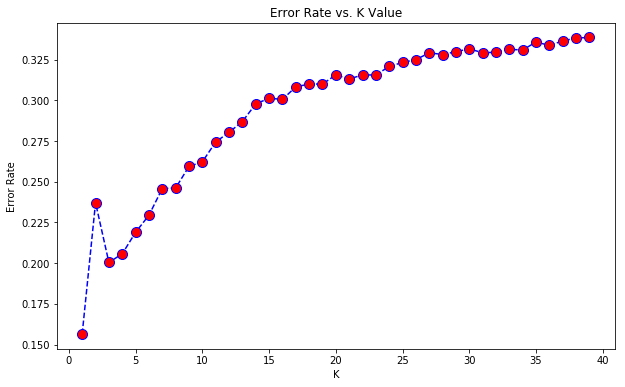

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [52]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[ 109   10    8   18]
 [  18  248   20   43]
 [   7   27  168   61]
 [  12   25   40 1098]]


             precision    recall  f1-score   support

        1.0       0.75      0.75      0.75       145
        2.0       0.80      0.75      0.78       329
        3.0       0.71      0.64      0.67       263
        4.0       0.90      0.93      0.92      1175

avg / total       0.85      0.85      0.85      1912



In [53]:
from sklearn.svm import SVC

In [54]:
svc_model = SVC()

In [55]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
predictions = svc_model.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))



[[  59   24    2   60]
 [   1  179    5  144]
 [   3   24   66  170]
 [   4   18    1 1152]]


In [57]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        1.0       0.88      0.41      0.56       145
        2.0       0.73      0.54      0.62       329
        3.0       0.89      0.25      0.39       263
        4.0       0.75      0.98      0.85      1175

avg / total       0.78      0.76      0.73      1912



In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
 gnb = GaussianNB()

In [60]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None)

In [61]:
predictions = gnb.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))

[[  26    0  119    0]
 [  34   14  281    0]
 [  15    0  244    4]
 [  51    3 1039   82]]


In [62]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        1.0       0.21      0.18      0.19       145
        2.0       0.82      0.04      0.08       329
        3.0       0.14      0.93      0.25       263
        4.0       0.95      0.07      0.13      1175

avg / total       0.76      0.19      0.14      1912

